In [3]:
# How to visualise?
# https://pypi.org/project/nipet/
# https://www.frontiersin.org/articles/10.3389/fninf.2018.00064/full
# https://github.com/marcomusy/vedo
# https://stackoverflow.com/questions/56035562/3d-dicom-visualisation-in-python
# https://www.youtube.com/watch?v=Tc9ONZLBHP0

# Saliency map?
# https://medium.com/@zeh.henrique92/basic-exploration-and-visualization-of-lung-ct-scans-with-python-e86b8d665bb6

TODO:
    * https://towardsdatascience.com/deep-learning-with-magnetic-resonance-and-computed-tomography-images-e9f32273dcb5
    * https://nilearn.github.io/manipulating_images/input_output.html
    * https://nilearn.github.io/auto_examples/plot_nilearn_101.html
    * https://vincentblog.xyz/posts/medical-images-in-python-computed-tomography?fbclid=IwAR33Nmfoq_u0RcdaXUSEWaJ4PlCOedqHafZnKTnQOQQk5mUuLC9LPvTaziU
    * https://nilearn.github.io/building_blocks/manual_pipeline.html
    * https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html#targeting-different-subplots

In [113]:
base_dir = 'dataset'

# Parse all xml files to pandas dataframe

## Find xml files

In [5]:
import xml.etree.ElementTree as ET
import os

path = base_dir+'/Meta'
files = []
def getXML():
    for filename in os.listdir(path):
        if not filename.endswith('.xml'): continue
        fullname = os.path.join(path, filename)
        tree = ET.parse(fullname)
        yield tree

## Load xml files

In [6]:
param = lambda r:"_"+list(r.attrib.values())[0] if r.attrib else ''

def dictify(r, parent='', delimiter=".") -> list:
    cont = {}
    # If list
    if layers := r.findall("./*"):
        [cont.update(dictify(x, parent=parent +delimiter+ x.tag)) for x in layers]
        return cont
        
    elif r.text and '\n' not in r.text: # get text
        return {parent + param(r):r.text}
    else:
        return {'dummy':None}

In [7]:
d = [dictify(root.findall('./*')[0], delimiter='') for root in getXML() for root in getXML()]
d[0]

{'projectIdentifier': 'ADNI',
 'projectDescription': "Alzheimer's Disease Neuroimaging Initiative",
 'siteKey': '003',
 'subject.subjectIdentifier': '003_S_1059',
 'subject.researchGroup': 'AD',
 'subject.subjectSex': 'F',
 'subject.subjectInfo_APOE A1': '3',
 'subject.subjectInfo_APOE A2': '3',
 'subject.visit.visitIdentifier': 'ADNI1/GO Month 24',
 'subject.visit.assessment.component.assessmentScore_MMSCORE': '24.0',
 'subject.visit.assessment.component.assessmentScore_GDTOTAL': '10.0',
 'subject.visit.assessment.component.assessmentScore_CDGLOBAL': '1.0',
 'subject.visit.assessment.component.assessmentScore_NPISCORE': '0.0',
 'subject.visit.assessment.component.assessmentScore_FAQTOTAL': '10.0',
 'subject.study.studyIdentifier': '19234',
 'subject.study.subjectAge': '86.71',
 'subject.study.ageQualifier': 'Y',
 'subject.study.weightKg': '73.94',
 'subject.study.postMortem': 'F',
 'subject.study.series.seriesIdentifier': '61310',
 'subject.study.series.modality': 'PET',
 'subject.stu

In [8]:
import pandas as pd

df = pd.DataFrame(list(d)).sort_values('subject.subjectIdentifier')
df

,projectIdentifier,projectDescription,siteKey,subject.subjectIdentifier,subject.researchGroup,subject.subjectSex,subject.subjectInfo_APOE A1,subject.subjectInfo_APOE A2,subject.visit.visitIdentifier,subject.visit.assessment.component.assessmentScore_MMSCORE,...,subject.study.imagingProtocol.protocolTerm.protocol_Slice Thickness,subject.study.imagingProtocol.protocolTerm.protocol_Convolution Kernel,subject.study.imagingProtocol.protocolTerm.protocol_Counts Source,subject.study.imagingProtocol.protocolTerm.protocol_Randoms Correction,subject.study.imagingProtocol.protocolTerm.protocol_Attenuation Correction,subject.study.imagingProtocol.protocolTerm.protocol_Decay Correction,subject.study.imagingProtocol.protocolTerm.protocol_Reconstruction,subject.study.imagingProtocol.protocolTerm.protocol_Scatter Correction,subject.study.imagingProtocol.protocolTerm.protocol_Radioisotope,dummy
194,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0295,CN,M,3,4,ADNI2 Initial Visit-Cont Pt,28.0,...,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
137,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0295,CN,M,3,4,ADNI2 Initial Visit-Cont Pt,28.0,...,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
1049,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0295,CN,M,3,4,ADNI2 Initial Visit-Cont Pt,28.0,...,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
1733,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0295,CN,M,3,4,ADNI2 Initial Visit-Cont Pt,28.0,...,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
3044,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0295,CN,M,3,4,ADNI2 Initial Visit-Cont Pt,28.0,...,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,ADNI,Alzheimer's Disease Neuroimaging Initiative,129,129_S_1246,MCI,M,3,4,ADNI1/GO Month 24,30.0,...,2.425,ramp,Dynamic emission,NaN,Measured,Start,CPU terative,Simulated 3D,F-18,NaN
2935,ADNI,Alzheimer's Disease Neuroimaging Initiative,129,129_S_1246,MCI,M,3,4,ADNI1/GO Month 24,30.0,...,2.425,ramp,Dynamic emission,NaN,Measured,Start,CPU terative,Simulated 3D,F-18,NaN
2251,ADNI,Alzheimer's Disease Neuroimaging Initiative,129,129_S_1246,MCI,M,3,4,ADNI1/GO Month 24,30.0,...,2.425,ramp,Dynamic emission,NaN,Measured,Start,CPU terative,Simulated 3D,F-18,NaN
769,ADNI,Alzheimer's Disease Neuroimaging Initiative,129,129_S_1246,MCI,M,3,4,ADNI1/GO Month 24,30.0,...,2.425,ramp,Dynamic emission,NaN,Measured,Start,CPU terative,Simulated 3D,F-18,NaN


# Convert to correct types

In [60]:
df['subject.study.subjectAge'] =  pd.to_numeric(df['subject.study.subjectAge']) 
df['subject.study.weightKg'] =  pd.to_numeric(df['subject.study.weightKg']) 
df['subject.study.series.dateAcquired'] = pd.to_datetime(df['subject.study.series.dateAcquired'], format='%Y-%m-%d')

# Load images

In [165]:
from functools import reduce
import yaml
def get_directory_structure(rootdir):
    """
    Creates a nested dictionary that represents the folder structure of rootdir
    """
    dir = {}
    rootdir = rootdir.rstrip(os.sep)
    start = rootdir.rfind(os.sep) + 1
    for path, dirs, files in os.walk(rootdir):
        folders = path[start:].split(os.sep)
        subdir = dict.fromkeys(files)
        parent = reduce(dict.get, folders[:-1], dir)
        parent[folders[-1]] = subdir
    return dir


def sort_files():
    # Compare with meta
    # Collect all data which have null value
    # Place the data with it in corresponding disorder: CN, AD, MCI
    # 
    pass
dir_files = get_directory_structure(base_dir + '/ADNI')
print(yaml.dump(dir_files, allow_unicode=True, default_flow_style=False))

ADNI:
  002_S_0295:
    ADNI_Brain_PET__Raw_FDG:
      2011-06-09_08_23_48.0:
        I239487:
          ADNI_002_S_0295_PT_ADNI_Brain_PET__Raw_FDG_br_raw_20110609102421118_60_S111104_I239487.nii: null
          ADNI_002_S_0295_PT_ADNI_Brain_PET__Raw_FDG_br_raw_20110609102444962_170_S111104_I239487.nii: null
          ADNI_002_S_0295_PT_ADNI_Brain_PET__Raw_FDG_br_raw_20110609102455165_398_S111104_I239487.nii: null
          ADNI_002_S_0295_PT_ADNI_Brain_PET__Raw_FDG_br_raw_20110609102456946_501_S111104_I239487.nii: null
          ADNI_002_S_0295_PT_ADNI_Brain_PET__Raw_FDG_br_raw_20110609102516493_291_S111104_I239487.nii: null
          ADNI_002_S_0295_PT_ADNI_Brain_PET__Raw_FDG_br_raw_20110609102526196_231_S111104_I239487.nii: null
  002_S_0413:
    ADNI_Brain_PET__Raw_FDG:
      2011-06-17_09_27_22.0:
        I240813:
          ADNI_002_S_0413_PT_ADNI_Brain_PET__Raw_FDG_br_raw_20110617111703939_328_S111993_I240813.nii: null
          ADNI_002_S_0413_PT_ADNI_Brain_PET__Raw_FDG_br_raw_2

# Analysis

df.groupby(['subject.study.series.dateAcquired'])# Analyse Metadata

## Disorder distribution

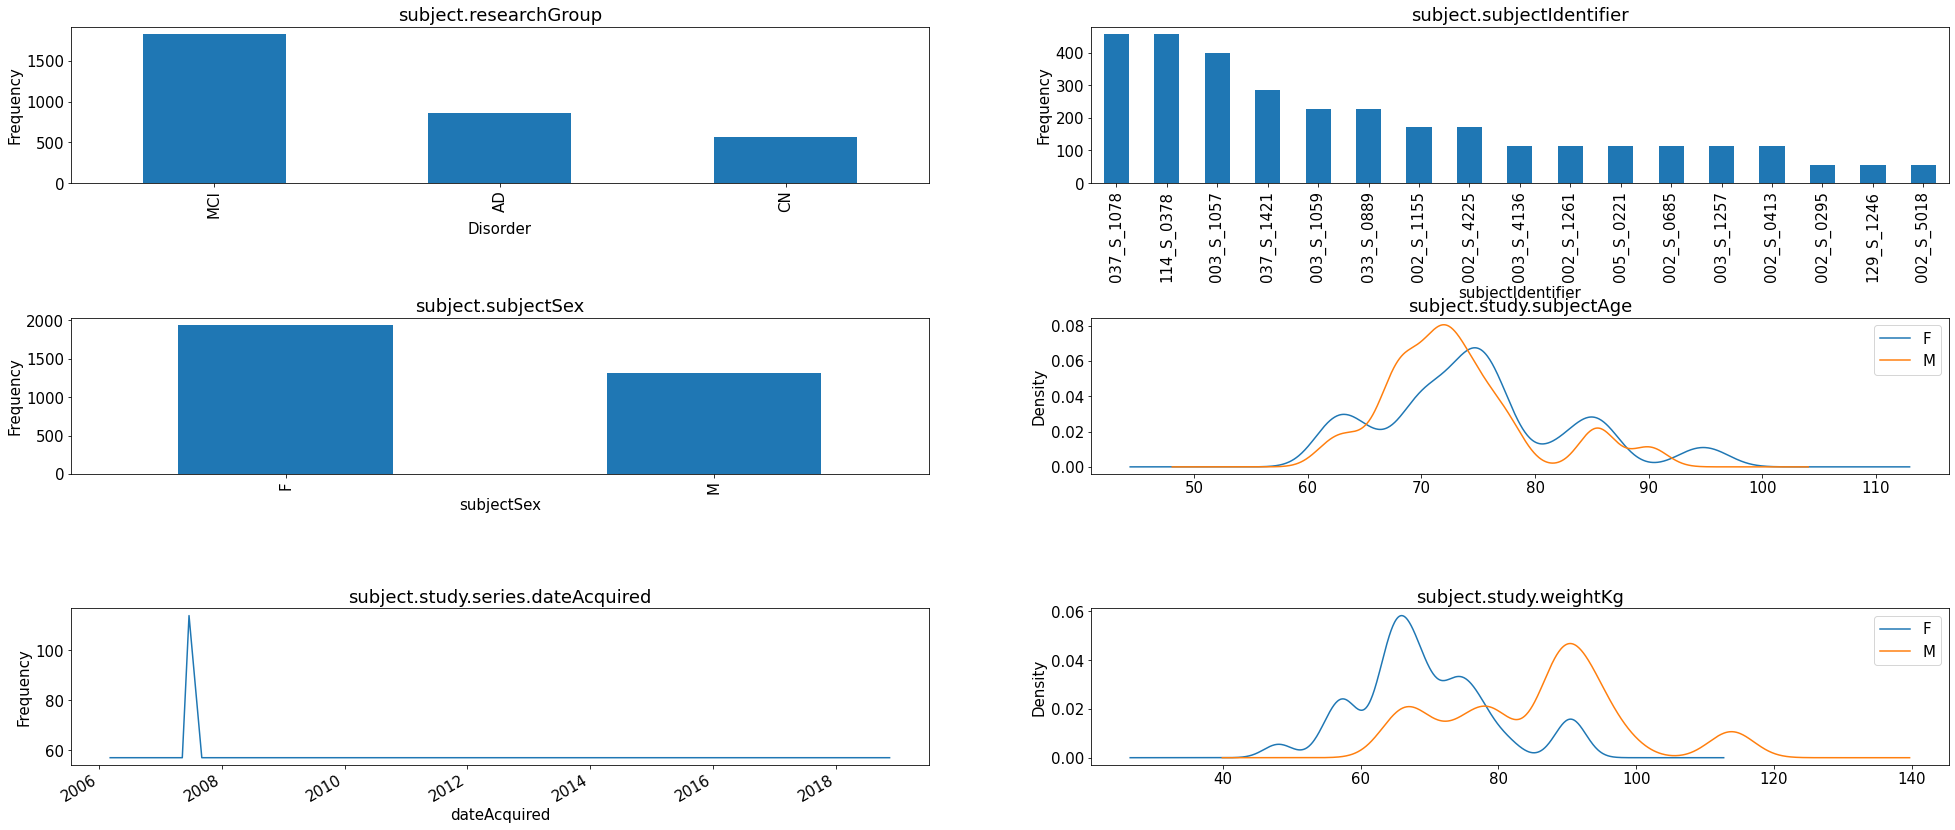

In [109]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30,15))
fig.tight_layout(pad=8.0)
#.plot(); axes[0,0].set_title('A')
df['subject.researchGroup'].value_counts().plot(kind='bar',
                                    ax=axes[0,0],
                                    title="subject.researchGroup", xlabel="Disorder", ylabel="Frequency")

df['subject.subjectIdentifier'].value_counts().plot(kind='bar',
                                    ax=axes[0,1],
                                    title="subject.subjectIdentifier", xlabel="subjectIdentifier", ylabel="Frequency")

df['subject.subjectSex'].value_counts().plot(kind='bar',
                                    ax=axes[1,0],
                                    title="subject.subjectSex", xlabel="subjectSex", ylabel="Frequency")

df.groupby('subject.subjectSex')['subject.study.subjectAge'].plot(kind='kde',
                                    ax=axes[1,1],
                                    title="subject.study.subjectAge", xlabel="subjectAge", ylabel="Frequency",legend=True)


pd.value_counts(df['subject.study.series.dateAcquired']).plot(
                                    ax=axes[2,0],
                                    title="subject.study.series.dateAcquired", xlabel="dateAcquired", ylabel="Frequency")

df.groupby('subject.subjectSex')['subject.study.weightKg'].plot(kind='kde',
                                    ax=axes[2,1],
                                    title="subject.study.weightKg", xlabel="weightKg", ylabel="Frequency",legend=True)
plt.show()


In [ ]:
# Notes
* Dont take 60 min dynamic - Iter(Brain Mod

In [ ]:
# Distribution of ages?

In [ ]:
# Can we see a difference between MCI, CN and AD?

In [ ]:
# How is the images before preprocess?

In [ ]:
# How is the images after preprocess?

In [ ]:
# Distribution? (Can be text as well)